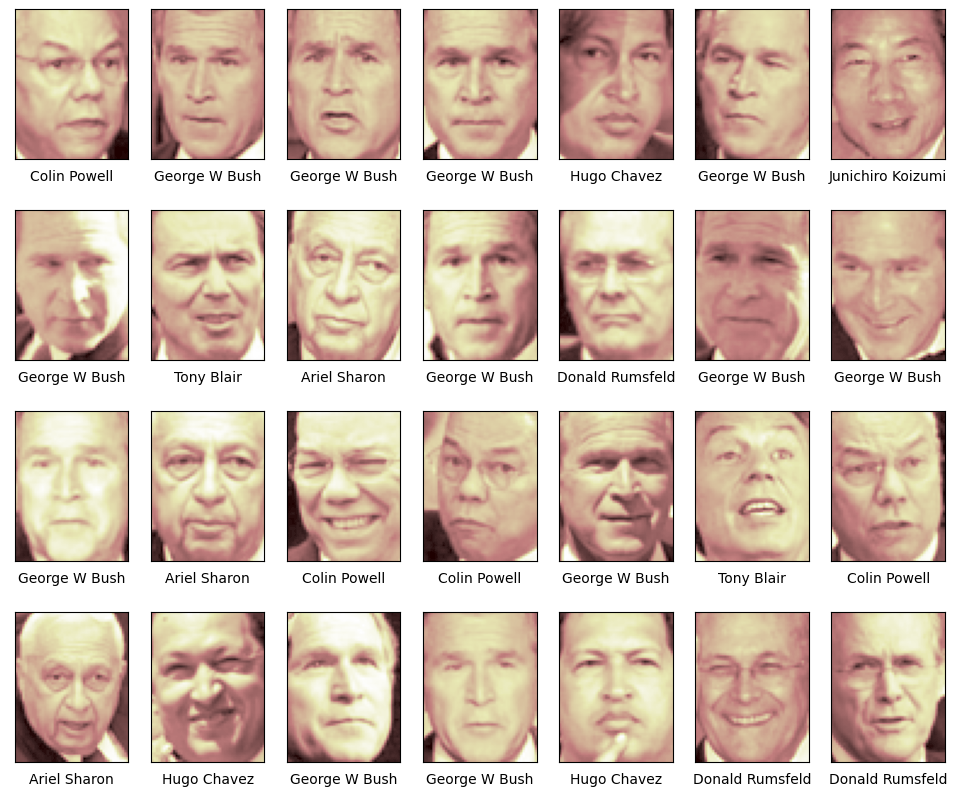

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.datasets import fetch_lfw_people # this will download images

faces = fetch_lfw_people(min_faces_per_person=60) # if you don't already have them

fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='pink')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

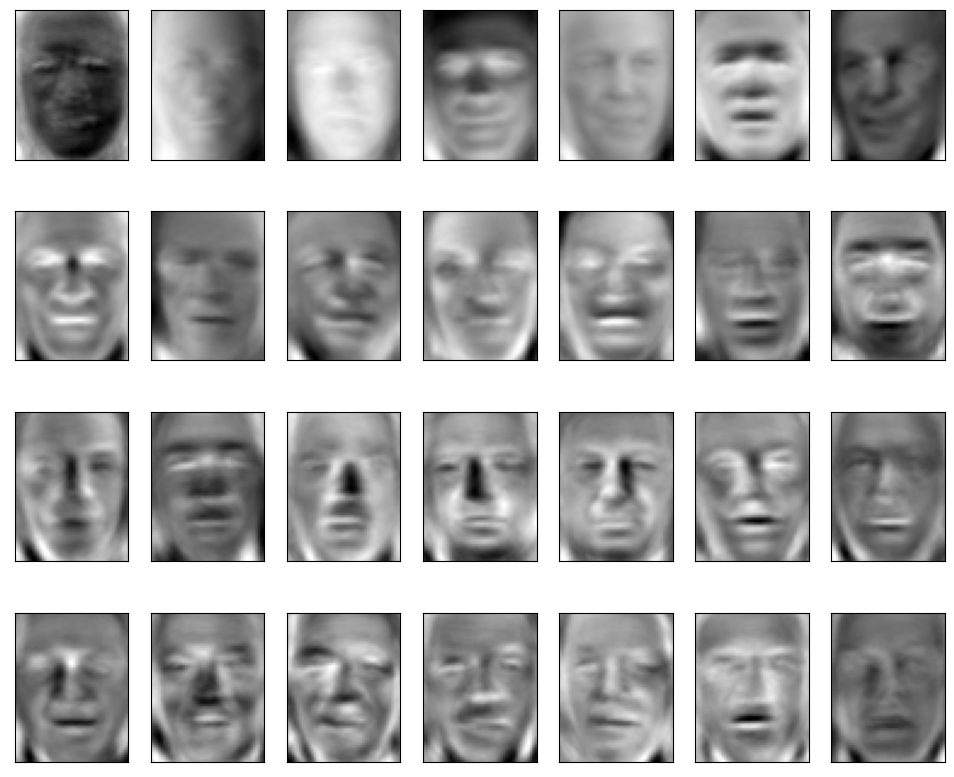

In [2]:
from sklearn.decomposition import PCA

# Perform PCA to obtain eigenfaces
n_components = 28  # Number of eigenfaces to display
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(faces.data)

# Display the first 28 eigenfaces
fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    eigenface = pca.components_[i].reshape(faces.images.shape[1], faces.images.shape[2])
    axi.imshow(eigenface, cmap='gray')
    axi.set(xticks=[], yticks=[])

plt.show()


In [3]:
# Define the desired explained variance (e.g., 95%)
desired_explained_variance = 0.95

# Perform PCA on the dataset and set the desired explained variance
pca = PCA(n_components=desired_explained_variance, svd_solver='full')
pca.fit(faces.data)

# Transform the original data to the reduced dimensionality
reduced_faces = pca.transform(faces.data)

# Reconstruct the dataset efficiently
reconstructed_faces = pca.inverse_transform(reduced_faces)

# Calculate the Frobenius norm of the error
frobenius_norm_error = np.linalg.norm(faces.data - reconstructed_faces, 'fro')

# Calculate the relative error
total_variance = np.linalg.norm(faces.data, 'fro')
relative_error = frobenius_norm_error / total_variance

print("Number of components (N):", pca.n_components_)
print("Relative Error:", relative_error)

# Check if the relative error is less than or equal to 5%
if relative_error <= 0.05:
    print("The relative error is within 5%.")
else:
    print("The relative error exceeds 5%.")

Number of components (N): 184
Relative Error: 0.06225583
The relative error exceeds 5%.


In [4]:
# Perform PCA with the previously determined N components
pca_task3 = PCA(n_components=N, svd_solver='full')
pca_task3.fit(faces.data)

# Select the last seven images for representation
last_seven_images = faces.data[-7:]

# Compute the representations of the last seven images using N eigenfaces
representations = pca_task3.transform(last_seven_images)

# Reconstruct the images from the representations
reconstructed_images = pca_task3.inverse_transform(representations)

# Visualize the original and reconstructed images
fig, ax = plt.subplots(2, 7, figsize=(12, 4))
for i in range(7):
    ax[0, i].imshow(last_seven_images[i].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    ax[0, i].set(xticks=[], yticks=[])

    ax[1, i].imshow(reconstructed_images[i].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    ax[1, i].set(xticks=[], yticks=[])

# Set titles for the subplots
ax[0, 0].set_title("Original Images")
ax[1, 0].set_title("Reconstructed Images")

plt.show()

NameError: name 'N' is not defined

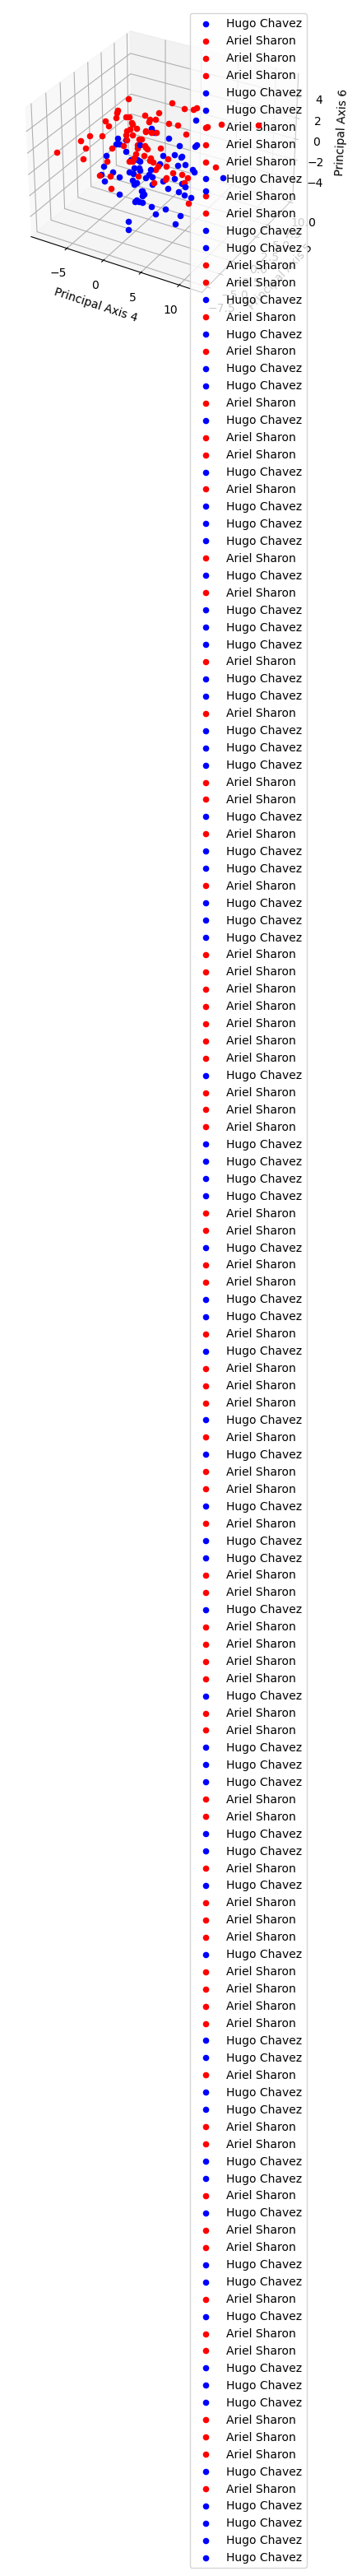

In [ ]:
# Filter the dataset to include only images of Ariel Sharon and Hugo Chavez
selected_indices = np.where((faces.target == faces.target_names.tolist().index('Ariel Sharon')) |
                            (faces.target == faces.target_names.tolist().index('Hugo Chavez')))

selected_data = faces.data[selected_indices]
selected_targets = faces.target[selected_indices]

# Perform PCA with 3 components (axes 4, 5, and 6)
pca_task4 = PCA(n_components=3, svd_solver='full')
pca_task4.fit(selected_data)

# Transform the data to the 3D space
transformed_data = pca_task4.transform(selected_data)

# Plot the data in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(selected_targets)):
    if selected_targets[i] == faces.target_names.tolist().index('Ariel Sharon'):
        ax.scatter(transformed_data[i, 0], transformed_data[i, 1], transformed_data[i, 2], c='r', label='Ariel Sharon')
    else:
        ax.scatter(transformed_data[i, 0], transformed_data[i, 1], transformed_data[i, 2], c='b', label='Hugo Chavez')

ax.set_xlabel("Principal Axis 4")
ax.set_ylabel("Principal Axis 5")
ax.set_zlabel("Principal Axis 6")

plt.legend()
plt.show()